# Tarefa 1 - Análise do Dataset do Occipital Lobe

Este dataset ***train_radiomics_occipital_CONTROL (DSocc)*** é utilizado como um dataset de controlo, uma vez que esta região cerebral não está associada ao desenvolvimento de demência, assim este permite verificar se as características radiômicas do hipocampo são realmente indicativos de progressão para Alzheimer.

In [15]:
! pip install researchpy

In [16]:
import pandas as pd
import sklearn as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Data Study

Aqui começamos, por importar o dataset, ***DSocc***, para pudermos iniciar o processo de análise e estudo do mesmo.

In [17]:
df = pd.read_csv('./datasets/train_radiomics_occipital_CONTROL.csv')
pd.options.display.max_columns = None

Começamos por imprimir as primeiras linhas dos datasets.

In [18]:
df.head()

ID                                              Image  \
0  006_S_0681  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  941_S_1203  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  011_S_0003  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  057_S_0779  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  033_S_0920  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                            2.2.0                     1.18.5   
1                            2.2.0                     1.18.5   
2                            2.2.0                     1.18.5   
3                            2.2.0                     1.18.5   
4                            2.2.0                     1.18.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          1.2.4                          1.1.1   
1                          1.2.4                          1.1.1   
2                          1.2.4                          1.1.1   
3                          1.2.4                          1.1.1   
4                          1.2.4                          1.1.1   

  diagnostics_Versions_Python  \
0                       3.7.7   
1                       3.7.7   
2                       3.7.7   
3                       3.7.7   
4                       3.7.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

         diagnostics_Configuration_EnabledImageTypes  \
0  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
1  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
2  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
3  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
4  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

            diagnostics_Image-original_Hash  \
0  b5d774a32163a7ee822d42a07808a787f8687f56   
1  397042d736bd790b7880b372b1749ff424f89cbe   
2  84d679a88812c4aaf03a6d99f00c913b2f64506f   
3  168f330d2ca3f097146e5d041f33b40672d230df   
4  ea5f291ea107dfda5e5c725eae7c0555ced44ce4   

   diagnostics_Image-original_Dimensionality  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

  diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
0                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
1                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
2                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
3                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
4                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

   diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                         5.848123                                   0   
1                         5.238834                                   0   
2                         6.816667                                   0   
3                         6.445162                                   0   
4                         5.568269                                   0   

   diagnostics_Image-original_Maximum  \
0                                 178   
1                                 190   
2                        

De seguida, imprimimos as últimas linhas dos datasets.

In [19]:
df.tail()

ID                                              Image  \
300  094_S_1241  /notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...   
301  067_S_0177  /notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...   
302  036_S_0748  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...   
303  053_S_0621  /notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...   
304  141_S_0767  /notebooks/disk2/DS2_FreeSurfer/ADNI_141_S_076...   

                                                  Mask  \
300  /notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...   
301  /notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...   
302  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...   
303  /notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...   
304  /notebooks/disk2/DS2_FreeSurfer/ADNI_141_S_076...   

    diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
300                            2.2.0                     1.18.5   
301                            2.2.0                     1.18.5   
302                            2.2.0                     1.18.5   
303                            2.2.0                     1.18.5   
304                            2.2.0                     1.18.5   

    diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
300                          1.2.4                          1.1.1   
301                          1.2.4                          1.1.1   
302                          1.2.4                          1.1.1   
303                          1.2.4                          1.1.1   
304                          1.2.4                          1.1.1   

    diagnostics_Versions_Python  \
300                       3.7.7   
301                       3.7.7   
302                       3.7.7   
303                       3.7.7   
304                       3.7.7   

                    diagnostics_Configuration_Settings  \
300  {'minimumROIDimensions': 2, 'minimumROISize': ...   
301  {'minimumROIDimensions': 2, 'minimumROISize': ...   
302  {'minimumROIDimensions': 2, 'minimumROISize': ...   
303  {'minimumROIDimensions': 2, 'minimumROISize': ...   
304  {'minimumROIDimensions': 2, 'minimumROISize': ...   

           diagnostics_Configuration_EnabledImageTypes  \
300  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
301  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
302  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
303  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
304  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

              diagnostics_Image-original_Hash  \
300  378e450ae013e20e1fbf6e0b3ec9a27adcabb48d   
301  fcc41c968ebeb6980d175c41dbf6dd80befa801e   
302  8123ad6d9ff372737d94e146c7174e2f32b7b44a   
303  cb03c6cd87f3c5eb6485b54d47a7cc8902db4598   
304  63aca41d5c87b25b6004b6338fbb9c6f8ca3efa0   

     diagnostics_Image-original_Dimensionality  \
300                                          3   
301                                          3   
302                                          3   
303                                          3   
304                                          3   

    diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
300                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
301                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
302                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
303                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
304                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

     diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
300                         6.268191                                   0   
301                         4.846839                                   0   
302                         6.562003                                   0   
303                         7.583210                                   0   
304                         5.329772                                   0   

     diagnostics_I

In [20]:
df.shape

(305, 2181)

Com o comando ***shape***, conseguimos verificar que existem ***305 entradas/linhas e 2181 atributos/colunas*** no dataset.
Para percebermos melhor o dataset, vamos utilizar o comando ***describe***, para visualizar as nossas estatísticas descritivas:

In [21]:
df.describe()

diagnostics_Image-original_Dimensionality  \
count                                      305.0   
mean                                         3.0   
std                                          0.0   
min                                          3.0   
25%                                          3.0   
50%                                          3.0   
75%                                          3.0   
max                                          3.0   

       diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                       305.000000                               305.0   
mean                          5.810469                                 0.0   
std                           0.613858                                 0.0   
min                           4.321602                                 0.0   
25%                           5.317298                                 0.0   
50%                           5.811449                                 0.0   
75%                           6.237751                                 0.0   
max                           7.583210                                 0.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                          305.000000                          305.000000   
mean                           173.504918                        19466.340984   
std                             24.108871                         2897.483977   
min                            128.000000                        10400.000000   
25%                            157.000000                        17521.000000   
50%                            172.000000                        19201.000000   
75%                            190.000000                        21155.000000   
max                            255.000000                        27345.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                           305.000000                 305.000000   
mean                              2.052459                   0.341178   
std                               0.298905                   0.028612   
min                               1.000000                   0.264643   
25%                               2.000000                   0.320818   
50%                               2.000000                   0.337811   
75%                               2.000000                   0.358698   
max                               4.000000                   0.464926   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count               305.000000                      305.000000   
mean                  0.280208                       35.478906   
std                   0.023283                        3.037412   
min                   0.218517                       28.008035   
25%                   0.266027                       33.366602   
50%                   0.282884                       35.915889   
75%                   0.296100                       37.525969   
max                   0.354095                       44.195456   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                      305.000000                              305.000000   
mean                       126.834935                              105.133775   
std                          7.896351                                6.029054   
min                        106.078376                               91.087870   
25%                        121.587654                              101.079177   
50%                        126.676845                              105.076163   
75%                        131.673788                              109.073370   
max                        155.809123                              124.145076   

       original_shape_Maximum2DDiameterRow  \
count                           305.000000   
mean                          

Para obtermos um resumo da informação contida no dataset, utilizamos o comando ***info***, para extrair toda a informação necesssária sobre o mesmo:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


### Missing Values

Para estender o nosso conhecimento sobre os datasets, vamos verificar a quantidade de missing values nos mesmos:

In [23]:
df.isna().any()[df.isna().any()]

Series([], dtype: bool)

In [24]:
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Com estes outputs, conseguimos verificar que não existem quaisquer missing values no nosso dataset.

### Duplicated Values

Agora iniciamos outra análise importante. Vamos verificar o nº de linhas duplicadas que existem no nosso dataset:

In [25]:
df.duplicated().sum()

0

Com este output, conseguimos verificar que não existem quaisquer duplicated values no nosso dataset.

Depois da nossa análise aos nosso dataset, verificamo que este:
- ***Tem 305 entradas/linhas;***
- ***Tem 2181 atributos/colunas, nos dois casos;***
- ***Não têm quaisquer valores nulos;***
- ***Não têm quaisquer valores duplicados.***

### Colunas duplicadas no dataset

Aqui vamos verificar no dataset, se têm colunas duplicadas, ou seja, com os mesmos valores em colunas diferentes. Isto depois pode se juntar uma análise à importância de atributos pode nos ajudar a limpar o nosso dataset, poupando recursos como memória, processamento de dados e tempo de execução do notebook.

In [26]:
duplicated_columns = df.T.duplicated(keep=False)

# Filtrar apenas as colunas duplicadas e seus conteúdos
duplicated_data = df.loc[:, duplicated_columns]

# Verificar se existem colunas duplicadas e exibir o número de duplicadas
if duplicated_data.empty:
    print("Nenhuma coluna duplicada encontrada.")
else:
    # Contar o número de colunas duplicadas
    num_duplicated_columns = duplicated_data.shape[1]
    print(f"Número de colunas duplicadas no dataset de treino: {num_duplicated_columns}")

Número de colunas duplicadas no dataset de treino: 305


### Colunas com valores únicos

Depois de uma breve análise, verificamos que existiam colunas que para as 305 entradas, tinham um valor único. Quando uma coluna contém o mesmo valor para todas as 305, esta não ajuda a distinguir entre as observações e não contribui para a construção de modelos, análises estatísticas, ou para entender padrões nos dados. Estas colunas podem ser consideradas redundantes e ocupam espaço desnecessário, o que também pode prejudicar a eficiência computacional ao aumentar o tempo de processamento.


In [27]:
constant_columns = df.columns[df.nunique() == 1]
print(constant_columns)

Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       ...
       'lbp-3D-m2_glszm_GrayLevelNonUniformityNormalized',
       'lbp-3D-m2_glszm_GrayLevelVariance',
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_SizeZoneNonUniformity', 'lbp-3D-m2_ngtdm_Busyness',
       'lbp-3D-m2_ngtdm_Coarseness', 'lbp-3D-m2_ngtdm_Complexity',
       'lbp-3D-m2_ngtdm_Contrast', 'lbp-3D-m2_ngtdm_Strength'],
      dtype='object', length=147)


Como podemos verificar, o dataset tem 147 colunas com valores únicos.

## Visual Data Study

Depois de se analisar umas partes dos dados, que no futuro poderam vir a ser pontos a resolver, vamos agora com a ajuda de gráficos e etc..., analisar mais a fundo um pouco os dados.

### Age

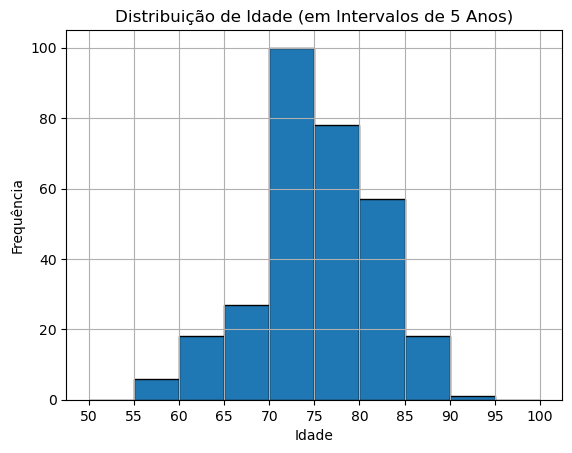

In [28]:
# Definir intervalos de idade de 5 em 5 anos de 50 a 100
bins = range(50, 105, 5)  # Intervalos de 5 anos

# Criar o histograma com os intervalos especificados
df['Age'].hist(bins=bins, edgecolor='black')
plt.title('Distribuição de Idade (em Intervalos de 5 Anos)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(bins)  # Mostrar as bordas dos bins no eixo x
plt.show()

Com este histograma, conseguimos perceber que os intervalos de idade com mais MRI's efetuados são os intervalos de *[70-80]*.

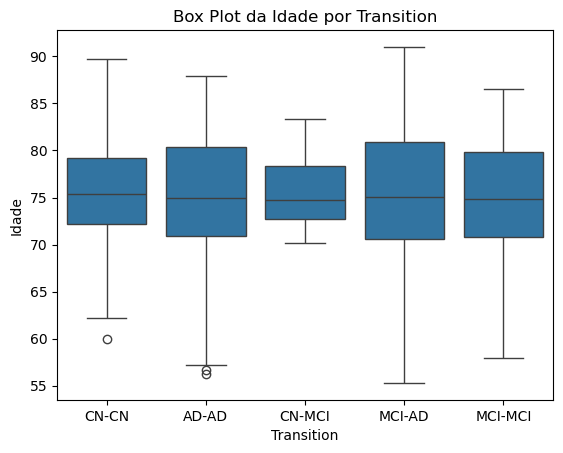

In [29]:
sns.boxplot(x='Transition', y='Age', data=df)
plt.title('Box Plot da Idade por Transition')
plt.xlabel('Transition')
plt.ylabel('Idade')
plt.show()

Este gráfico ajuda a entender se a idade tem uma variação significativa entre os diferentes grupos de transição, o que pode ser relevante em análises sobre a progressão ou prevalência de condições de saúde.

### Sex

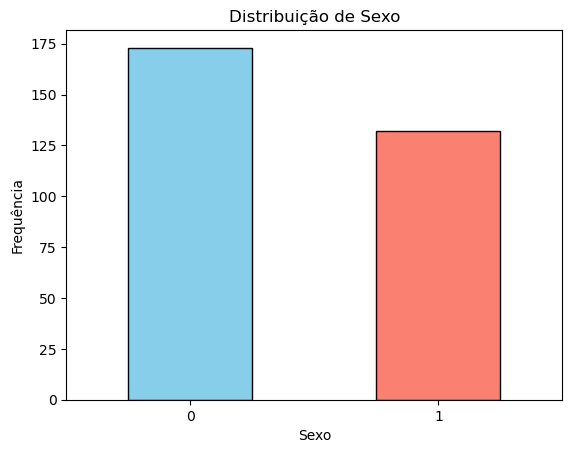

In [30]:
df['Sex'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribuição de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)  # Opcional: Define os rótulos como '0' e '1'
plt.show()

Sex          0   1
Transition        
AD-AD       29  31
CN-CN       48  48
CN-MCI       6   4
MCI-AD      25  43
MCI-MCI     24  47


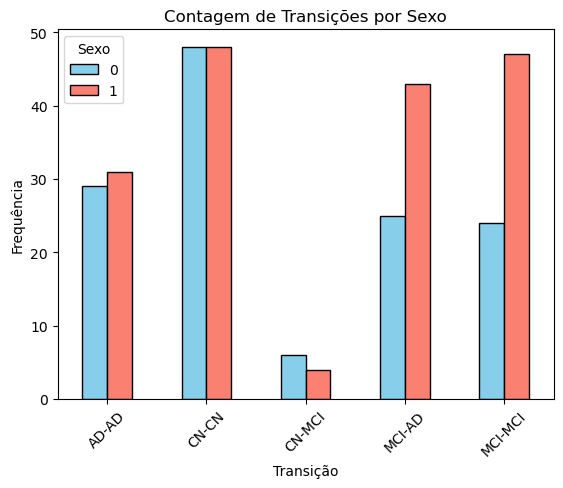

In [31]:
# Contagem de cada categoria de Transition por Sexo
transition_sex_counts = df.groupby(['Transition', 'Sex']).size().unstack()
print(transition_sex_counts)

# Criar o gráfico de barras agrupado para cada Transition por Sexo
transition_sex_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Contagem de Transições por Sexo')
plt.xlabel('Transição')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo X para facilitar a leitura
plt.legend(title='Sexo', labels=['0', '1'])  # Legenda para distinguir os sexos
plt.show()

### Transition

Transition
CN-CN      96
MCI-MCI    71
MCI-AD     68
AD-AD      60
CN-MCI     10
Name: count, dtype: int64


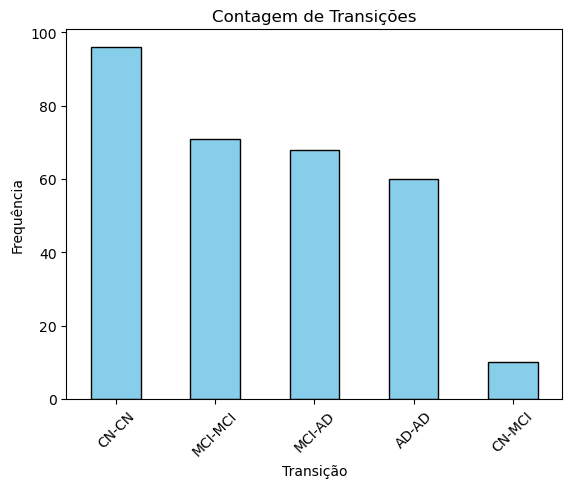

In [32]:
print(df['Transition'].value_counts())
transition_counts = df['Transition'].value_counts()

# Criar o gráfico de barras
transition_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contagem de Transições')
plt.xlabel('Transição')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.show()